In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Numerical Methods to Solve the Advection Equation
$$u_x + a u_t = 0 $$
### The methods used are Upwind, Lax-Friedrichs and Lax-Wendroff

In [7]:
# iteration matrices for different schemes

# Upwind matrix
def UPW_itr_matrix(k, h, m, a = 1):
    A = np.zeros((m,m))
    v = a * k / h
    for i in range(0,m):
        A[i % m , (i-1) % m] = v
        A[i % m, i % m] = 1 - v
    return A

# Lax-Friedichs matrix
def LF_itr_matrix(k, h, m, a = 1):
    A = np.zeros((m,m))
    v = a * k / h
    for i in range(0,m):
        A[i % m, (i-1) % m] = 0.5 + 0.5 * v
        A[i % m, (i+1) % m] = 0.5 - 0.5 * v
    return A

# Lax-Wendroff matrix
def LW_itr_matrix(k, h, m, a = 1):
    A = np.zeros((m,m))
    v = a * k / h
    for i in range(0,m):
        A[i % m, (i-1) % m] = (v + v**2) / 2
        A[i % m, i % m] = 1 - v**2
        A[i % m, (i+1) % m] = (-v + v**2) / 2
    return A

In [8]:
# Advection equation solver
def adv_eq_solver(u0 = lambda x : 0, a = 1, h = 0.05, k = 0.04, xi = 0, xf = 6, ti = 0, tf = 2, method = 'LF'):
    '''
    Advection Equation Solver
    Inputs:
        u0     : initial condition
        a      : wave velocity
        h      : space discretization grid size
        k      : time discretization step size
        xi     : left boundary of space set
        xf     : right boundary of space set
        ti     : initial time
        tf     : final time
        method : numerical scheme to be used. Options are Upwind : 'UPW', Lax-Friedrichs : 'LF' and Lax-Wendroff : 'LW'
    Intermediate:
        m      : number of space discretization points
        n      : number of time discretization points
        A      : iteration matrix
    Output:
        u      : computed numerical solution
        X      : space grid points
        T      : time grid points
    '''

    # x grid points
    X = np.linspace(xi,xf, (xf - xi) * int(1/h) + 1)
    # time steps t
    T = np.linspace(ti, tf, (tf - ti) * int(1/k) + 1)
    # number of space discretization points
    m = X.shape[0]
    # number of timesteps
    n = T.shape[0]
    
    # prealocate computed solution u
    u = np.zeros( (m, n) ) 
    # initial condition
    u[:, 0] = np.array([u0(x) for x in X])
    
    # compute iteration matrix for the method specified in the function call
    if method == 'UPW':
        A = UPW_itr_matrix(k, h, m, a)
    elif method == 'LF':
        A = LF_itr_matrix(k, h, m, a)
    elif method == 'LW':
        A = LW_itr_matrix(k, h, m, a)
    else:
        raise ValueError("Method name not valid.")
    
    # time marching
    for i in range(n-1):
        u[:, i+1] = A @ u[:, i]
        
    return u, X, T

### Initial Conditions Used

In [9]:
# initial conditions

def f1(x):
    # make function periodic
    x = x % 6
    if x == 0:
        return 0
    if x > 0 and x < 2:
        return 1
    if x == 2:
        return 0.5
    if x > 2 and x <= 6:
        return 0
    return -1

def f2(x):
    # make function periodic
    x = x % 6
    if x >= 0 and x < 1:
        return 0
    if x >= 1 and x <= 3:
        return 1 - abs(x-2)
    if x > 3 and x <= 6:
        return 0
    return -1

# true solutions
true_u1 = lambda x, t : f1(x-t)
true_u2 = lambda x,t : f2(x-t)

## Upwind Scheme

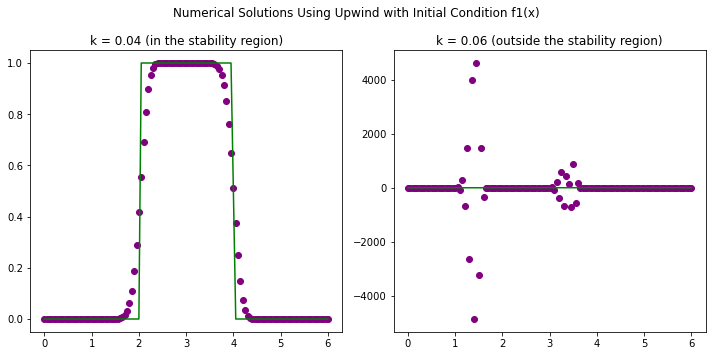

In [10]:
# plot numerical solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Numerical Solutions Using Upwind with Initial Condition f1(x)")

# solution with h = 0.05, k = 0.04 (in the stability region)
UPW_u1, UPW_X1, UPW_T1 = adv_eq_solver(f1, k = 0.04, method = 'UPW')
ax1.scatter(UPW_X1, UPW_u1[:,-1], label  = "Computed solution", color = 'purple')
ax1.plot(UPW_X1, [true_u1(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax1.set_title("k = 0.04 (in the stability region)")

# solution with h = 0.05, k = 0.06 (outside of stability region)
UPW_u1, UPW_X1, UPW_T1 = adv_eq_solver(f1, k = 0.06, method = 'UPW')
ax2.scatter(UPW_X1, UPW_u1[:,-1], label  = "Computed solution", color = 'purple')
ax2.plot(UPW_X1, [true_u1(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax2.set_title("k = 0.06 (outside the stability region)")

plt.tight_layout()

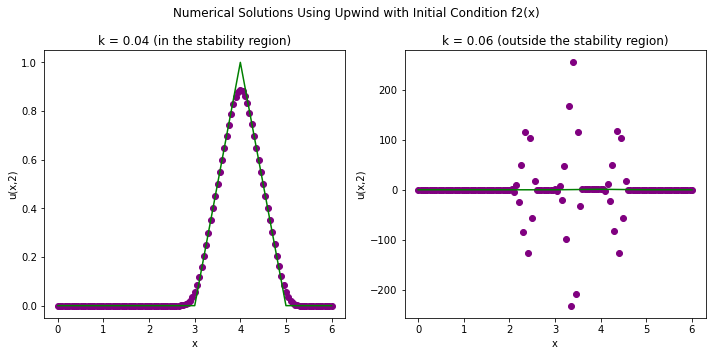

In [11]:
# plot numerical solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Numerical Solutions Using Upwind with Initial Condition f2(x)")

# solution with h = 0.05, k = 0.04 (in the stability region)
UPW_u2, UPW_X2, UPW_T2 = adv_eq_solver(f2, k = 0.04, method = 'UPW')
ax1.scatter(UPW_X2, UPW_u2[:,-1], label  = "Computed solution", color = 'purple')
ax1.plot(UPW_X2, [true_u2(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax1.set_title("k = 0.04 (in the stability region)")
ax1.set(xlabel = "x", ylabel = "u(x,2)")

# solution with h = 0.05, k = 0.06 (outside of stability region)
UPW_u2, UPW_X2, UPW_T2 = adv_eq_solver(f2, k = 0.06, method = 'UPW')
ax2.scatter(UPW_X2, UPW_u2[:,-1], label  = "Computed solution", color = 'purple')
ax2.plot(UPW_X2, [true_u2(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax2.set_title("k = 0.06 (outside the stability region)")
ax2.set(xlabel = "x", ylabel = "u(x,2)")

plt.tight_layout()

## Lax-Friedrichs Scheme

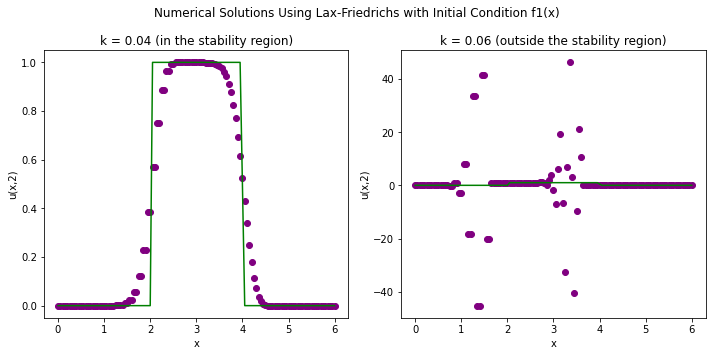

In [7]:
# plot numerical solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Numerical Solutions Using Lax-Friedrichs with Initial Condition f1(x)")

# solution with h = 0.05, k = 0.04 (in the stability region)
UPW_u1, UPW_X1, UPW_T1 = adv_eq_solver(f1, k = 0.04, method = 'LF')
ax1.scatter(UPW_X1, UPW_u1[:,-1], label  = "Computed solution", color = 'purple')
ax1.plot(UPW_X1, [true_u1(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax1.set_title("k = 0.04 (in the stability region)")
ax1.set(xlabel = "x", ylabel = "u(x,2)")

# solution with h = 0.05, k = 0.06 (outside of stability region)
UPW_u1, UPW_X1, UPW_T1 = adv_eq_solver(f1, k = 0.06, method = 'LF')
ax2.scatter(UPW_X1, UPW_u1[:,-1], label  = "Computed solution", color = 'purple')
ax2.plot(UPW_X1, [true_u1(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax2.set_title("k = 0.06 (outside the stability region)")
ax2.set(xlabel = "x", ylabel = "u(x,2)")

plt.tight_layout()

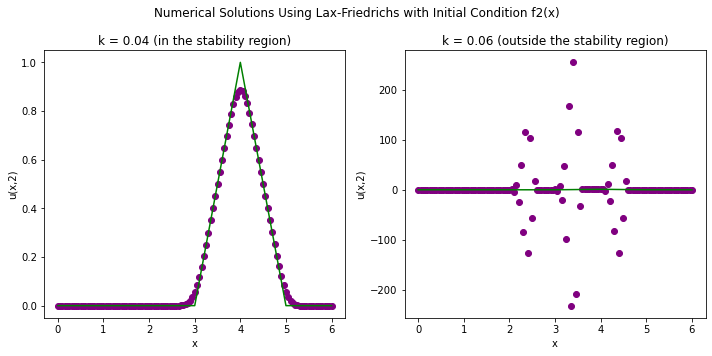

In [8]:
# plot numerical solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Numerical Solutions Using Lax-Friedrichs with Initial Condition f2(x)")

# solution with h = 0.05, k = 0.04 (in the stability region)
UPW_u2, UPW_X2, UPW_T2 = adv_eq_solver(f2, k = 0.04, method = 'UPW')
ax1.scatter(UPW_X2, UPW_u2[:,-1], label  = "Computed solution", color = 'purple')
ax1.plot(UPW_X2, [true_u2(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax1.set_title("k = 0.04 (in the stability region)")
ax1.set(xlabel = "x", ylabel = "u(x,2)")

# solution with h = 0.05, k = 0.06 (outside of stability region)
UPW_u2, UPW_X2, UPW_T2 = adv_eq_solver(f2, k = 0.06, method = 'UPW')
ax2.scatter(UPW_X2, UPW_u2[:,-1], label  = "Computed solution", color = 'purple')
ax2.plot(UPW_X2, [true_u2(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax2.set_title("k = 0.06 (outside the stability region)")
ax2.set(xlabel = "x", ylabel = "u(x,2)")

plt.tight_layout()

## Lax-Wendroff Scheme

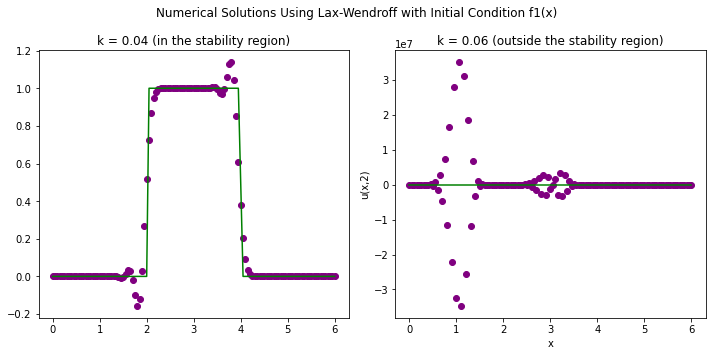

In [9]:
# plot numerical solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Numerical Solutions Using Lax-Wendroff with Initial Condition f1(x)")

# solution with h = 0.05, k = 0.04 (in the stability region)
UPW_u1, UPW_X1, UPW_T1 = adv_eq_solver(f1, k = 0.04, method = 'LW')
ax1.scatter(UPW_X1, UPW_u1[:,-1], label  = "Computed solution", color = 'purple')
ax1.plot(UPW_X1, [true_u1(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax1.set_title("k = 0.04 (in the stability region)")

# solution with h = 0.05, k = 0.06 (outside of stability region)
UPW_u1, UPW_X1, UPW_T1 = adv_eq_solver(f1, k = 0.06, method = 'LW')
ax2.scatter(UPW_X1, UPW_u1[:,-1], label  = "Computed solution", color = 'purple')
ax2.plot(UPW_X1, [true_u1(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax2.set_title("k = 0.06 (outside the stability region)")
ax2.set(xlabel = "x", ylabel = "u(x,2)")

plt.tight_layout()

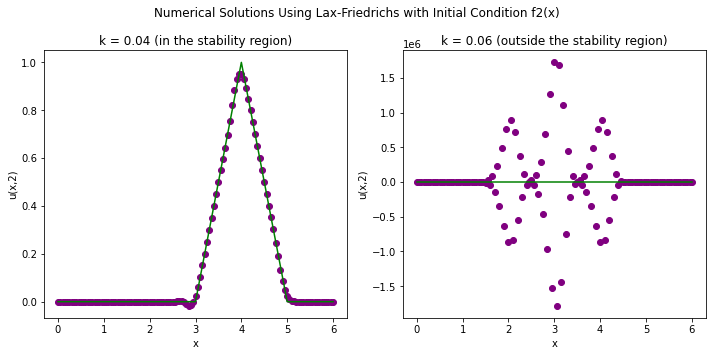

In [10]:
# plot numerical solution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle("Numerical Solutions Using Lax-Friedrichs with Initial Condition f2(x)")

# solution with h = 0.05, k = 0.04 (in the stability region)
UPW_u2, UPW_X2, UPW_T2 = adv_eq_solver(f2, k = 0.04, method = 'LW')
ax1.scatter(UPW_X2, UPW_u2[:,-1], label  = "Computed solution", color = 'purple')
ax1.plot(UPW_X2, [true_u2(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax1.set_title("k = 0.04 (in the stability region)")
ax1.set(xlabel = "x", ylabel = "u(x,2)")

# solution with h = 0.05, k = 0.06 (outside of stability region)
UPW_u2, UPW_X2, UPW_T2 = adv_eq_solver(f2, k = 0.06, method = 'LW')
ax2.scatter(UPW_X2, UPW_u2[:,-1], label  = "Computed solution", color = 'purple')
ax2.plot(UPW_X2, [true_u2(x,2) for x in UPW_X1], label = "True solution", color = 'g')
ax2.set_title("k = 0.06 (outside the stability region)")
ax2.set(xlabel = "x", ylabel = "u(x,2)")

plt.tight_layout()